Aim:
format the data and merge them in one table

In [91]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [69]:
#choose the file to import to df
h = [i for i in os.listdir() if 'Hu_Vker' in i]
co = [i for i in os.listdir() if 'Com_Vker' in i]
ce = [i for i in os.listdir() if 'Cen_Vker' in i]
print('Hu:', h)
print('Com:', co)
print('Cen', ce)

Hu: ['Hu_Vker.csv', 'Hu_Vker2019-11-06.csv']
Com: ['Com_Vker.csv', 'Com_Vker2019-11-06.csv']
Cen ['Cen_Vker.csv', 'Cen_Vker2019-11-06.csv']


In [70]:
Hun = pd.read_csv(h[-1])
Com = pd.read_csv(co[-1])
Cen = pd.read_csv(ce[-1])
print('Shape of Hun',Hun.shape)
print('Shape of Com',Com.shape)
print('Shape of Cen',Cen.shape)

Shape of Hun (26, 9)
Shape of Com (1533, 11)
Shape of Cen (7, 10)


#### clean up the source data

In [72]:
Hun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
id             26 non-null int64
sqm            26 non-null int64
room           26 non-null int64
price          26 non-null int64
description    26 non-null object
agency         19 non-null object
url            26 non-null object
date           26 non-null object
source         26 non-null object
dtypes: int64(4), object(5)
memory usage: 1.9+ KB


In [73]:
Hun.isnull().sum()

id             0
sqm            0
room           0
price          0
description    0
agency         7
url            0
date           0
source         0
dtype: int64

In [32]:
#HUN.loc[HUN['sqm'].isnull()]

In [48]:
#delete the extra rows
HUN.drop(HUN.loc[HUN['sqm'].isnull()].index, axis = 0, inplace= True)
HUN.shape

(867, 10)

In [74]:
#create 'price_sqm' column
Hun['price_sqm'] = Hun['price'] / Hun['sqm']
Hun['price_sqm'] = Hun['price_sqm'].astype(int)
Hun['price'] = Hun['price'] / 1000000.0

In [75]:
Hun.head(3)

,id,sqm,room,price,description,agency,url,date,source,price_sqm
0,9737329,32,1,39.9,"3 az 1-ben! Tökéletes befektetés, ahol a moder...",CDC Ingatlan IV.Ker. Szita Ingatlan Kft.,https://ingatlanok.hu/elado/lakas/budapest_v_k...,2019-11-04,hu,1246875
1,9729050,32,1,39.9,"3 az 1-ben! Tökéletes befektetés, ahol a moder...",Cdci Teréz krt-i iroda,https://ingatlanok.hu/elado/lakas/budapest_v_k...,2019-11-04,hu,1246875
2,9603730,33,1,44.3,EGYETEMISTÁK - BEFEKTETŐK- ELSŐ LAKÁSUKAT KERE...,NaN,https://ingatlanok.hu/elado/lakas/budapest_v_k...,2019-11-04,hu,1342424


In [18]:
Com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533 entries, 0 to 1532
Data columns (total 11 columns):
id             1533 non-null int64
sqm            1533 non-null int64
room           1533 non-null int64
price          1533 non-null float64
price_sqm      1533 non-null int64
description    0 non-null float64
agency         129 non-null object
url            1533 non-null object
region         1533 non-null object
date           1533 non-null object
source         1533 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 131.8+ KB


In [19]:
Com.isnull().sum()

id                0
sqm               0
room              0
price             0
price_sqm         0
description    1533
agency         1404
url               0
region            0
date              0
source            0
dtype: int64

In [20]:
Com.head(3)

,id,sqm,room,price,price_sqm,description,agency,url,region,date,source
0,30407710,26,1,26.4,1015385,NaN,NaN,https://ingatlan.com/v-ker/elado+lakas/tegla-e...,"Lipótváros, V. kerület",2019-11-04,com
1,29700953,26,1,26.4,1015385,NaN,NaN,https://ingatlan.com/v-ker/elado+lakas/tegla-e...,"Kálmán Imre utca 21, V. kerület",2019-11-04,com
2,29993006,26,1,29.9,1150000,NaN,NaN,https://ingatlan.com/v-ker/elado+lakas/tegla-e...,"Papnövelde utca, V. kerület",2019-11-04,com


In [76]:
Cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
id             7 non-null int64
sqm            7 non-null int64
room           7 non-null int64
price          7 non-null float64
description    7 non-null object
agency         0 non-null float64
url            7 non-null object
region         7 non-null object
date           7 non-null object
source         7 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 640.0+ bytes


In [77]:
Cen.isnull().sum()

id             0
sqm            0
room           0
price          0
description    0
agency         7
url            0
region         0
date           0
source         0
dtype: int64

In [78]:
Cen.head(3)

,id,sqm,room,price,description,agency,url,region,date,source
0,14123464,33,1,75.0,Kis lakás panorámával\nA Parlament és az Olimp...,NaN,https://www.oc.hu/ingatlanok/H397307?c=1b06e8e0,H397307,2019-11-04,centrum
1,12625576,33,1,44.3,Garzonlakás a Váci utcában\nFelújítandó egy sz...,NaN,https://www.oc.hu/ingatlanok/H387534?c=1b06e8e0,H387534,2019-11-04,centrum
2,13205004,28,1,45.0,V. Garibaldi utca\nV. kerület egyik legkedvelt...,NaN,https://www.oc.hu/ingatlanok/H391318?c=1b06e8e0,H391318,2019-11-04,centrum


In [79]:
Cen['price_sqm'] = Cen['price']*1000000 / Cen['sqm']
Cen['price_sqm'] = Cen['price_sqm'].astype(int)

#### create one DB

In [81]:
VkerDB = pd.concat([Hun,com,Cen], axis = 0, sort = True, ignore_index = True)
VkerDB.shape

(2593, 11)

In [82]:
# cleaning-up 'room'
VkerDB['room'].value_counts()

1.0    2411
2.0     143
1.5      38
0.0       1
Name: room, dtype: int64

In [83]:
VkerDB.loc[VkerDB['room'] == '1 + 1 félszoba', 'room'] = 1.5
VkerDB['room'] = VkerDB['room'].astype(float)
VkerDB.loc[VkerDB['room'] == 0.0, 'room'] = 1.0

/home/trismegistos/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [84]:
VkerDB['room'].value_counts()

1.0    2412
2.0     143
1.5      38
Name: room, dtype: int64

In [66]:
#cleaning-up 'type'
#VkerDB['type'].value_counts()

Tégla    987
Nincs     40
Name: type, dtype: int64

In [69]:
#Type is not informative, delete from data extraction
#VkerDB.drop(['type'], axis = 1, inplace= True)

In [85]:
#cleaning-up agency
VkerDB['agency'].value_counts()

Saját hirdetés                               129
CDC Ingatlan IV.Ker. Szita Ingatlan Kft.      92
Homexpress Ingatlaniroda                      63
Gold House Ingatlaniroda                      62
Cdci Teréz krt-i iroda                        53
GREAT HOME                                    49
Duna House - XII. ker, Városmajor utca u.     48
Tecnocasa                                     41
CDC Bokréta                                   41
CDC Báthory                                   39
GDN Ingatlaniroda.                            39
OTP Ingatlanpont Szépvölgyi út                29
Smart Falk Miksa                              25
CDC Keleti károly                             19
Duna House Kossuth Utca                       18
OTP Ingatlanpont Hűvösvölgyi út               18
Városi Ingatlaniroda                          17
OTPIP Kreativ Ingatlaniroda                   16
Smart Ingatlan Podmaniczky utca               12
Central Home                                  12
Duna House József At

In [86]:
VkerDB.isnull().sum()

agency         1726
date              0
description    1533
id                0
price             0
price_sqm         0
region          893
room              0
source            0
sqm               0
url               0
dtype: int64

#### reorganise columns

In [87]:
VkerDB = VkerDB[['id', 'date', 'price', 'price_sqm', 'room', 'sqm','region','description','agency', 'source','url']]

In [88]:
Dbfull = pd.read_csv('VkerDB.csv')
print('No of ads: ',Dbfull.shape)
alls = pd.concat([Dbfull,VkerDB], axis = 0, ignore_index= True)
#alls.to_csv('VkerDB.csv', index=False, index_label=None)

In [90]:
counts = sorted(zip(alls['date'].value_counts().index,alls['date'].value_counts()))

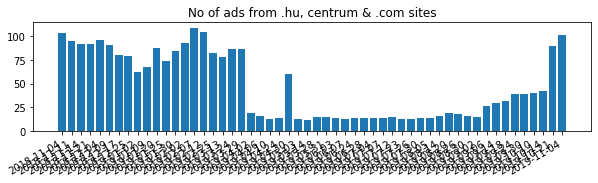

In [104]:
fig = plt.figure(figsize=(10,2))
plt.bar([i[0] for i in counts],[i[1] for i in counts])
plt.title('No of ads from .hu, centrum & .com sites')
plt.xticks(rotation=30, ha = 'right')
plt.show()